# Exploring WRF-SFire output file

***

## Loading data

In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset('wrfout_d02_2025-08-15_00%3A00%3A00')
ds

<xarray.Dataset> Size: 9GB
Dimensions:                (Time: 1, south_north: 153, west_east: 180,
                            south_north_subgrid: 6160, west_east_subgrid: 7240,
                            bottom_top_stag: 35, west_east_stag: 181,
                            south_north_stag: 154,
                            fuel_moisture_classes_stag: 5,
                            fuel_moisture_extended_paramete: 2, bottom_top: 34,
                            seed_dim_stag: 2)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 110kB ...
    XLONG                  (Time, south_north, west_east) float32 110kB ...
    XTIME                  (Time) datetime64[ns] 8B ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 111kB ...
    XLONG_U                (Time, south_north, west_east_stag) float32 111kB ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 111kB ...
    XLONG_V                (Time, south_north_stag, west_east) float32 111kB ...
Dimensions without coordinates: Time, south_north, west_east,
                                south_north_subgrid, west_east_subgrid,
                                bottom_top_stag, west_east_stag,
                                south_north_stag, fuel_moisture_classes_stag,
                                fuel_moisture_extended_paramete, bottom_top,
                                seed_dim_stag
Data variables: (12/109)
    Times                  (Time) |S19 19B ...
    LU_INDEX               (Time, south_north, west_east) float32 110kB ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 4B ...
    T2                     (Time, south_north, west_east) float32 110kB ...
    U10                    (Time, south_north, west_east) float32 110kB ...
    V10                    (Time, south_north, west_east) float32 110kB ...
    ...                     ...
    C4F                    (Time, bottom_top_stag) float32 140B ...
    PCB                    (Time, south_north, west_east) float32 110kB ...
    PC                     (Time, south_north, west_east) float32 110kB ...
    LAKEMASK               (Time, south_north, west_east) float32 110kB ...
    SST                    (Time, south_north, west_east) float32 110kB ...
    SST_INPUT              (Time, south_north, west_east) float32 110kB ...
Attributes: (12/132)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2025-08-13_18:00:00
    SIMULATION_START_DATE:           2025-08-13_18:00:00
    WEST-EAST_GRID_DIMENSION:        181
    SOUTH-NORTH_GRID_DIMENSION:      154
    BOTTOM-TOP_GRID_DIMENSION:       35
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.05

## Map projection
This example uses a Mercator projection with 

$truelat = 40.583$

In [4]:
ds.attrs['MAP_PROJ'], ds.attrs['MAP_PROJ_CHAR']

(np.int32(3), 'Mercator')

In [5]:
ds.attrs['TRUELAT1']

np.float32(40.583)

## Grid definitions

There are two main grid definitions in the sample file. The basic grid for meteorological variables with the following sizes for the unstaggered grid:

In [6]:
dim_atts = ['WEST-EAST_GRID_DIMENSION', 'SOUTH-NORTH_GRID_DIMENSION', 'BOTTOM-TOP_GRID_DIMENSION']

for att in dim_atts:
    print(f"{att}: {ds.attrs[att]}")

WEST-EAST_GRID_DIMENSION: 181
SOUTH-NORTH_GRID_DIMENSION: 154
BOTTOM-TOP_GRID_DIMENSION: 35


and another finner grid for fire-related variables with sizes:

In [7]:
dim_atts = ['south_north_subgrid','south_north_subgrid']

for att in dim_atts:
    print(f"{att}: {ds.sizes[att]}")

south_north_subgrid: 6160
south_north_subgrid: 6160


## List of WRF-SFIRE variables

The list of variables defined on this high-resolution grid includes:

In [8]:
vars = [var for var, da in ds.data_vars.items() if 'south_north_subgrid' in da.dims]

for var in vars:
    print(f"{var}: {ds[var].description}")

NFUEL_CAT: fuel data
ZSF: height of surface above sea level
DZDXF: surface gradient x
DZDYF: surface gradient y
TIGN_G: ignition time on ground
FIRE_HFX: observed fire heat flux
LFN: level function
FUEL_FRAC: fuel remaining
FIRE_AREA: fraction of cell area on fire
TIGN_IN: minimal ignition time on ground
UF: fire wind
VF: fire wind
CUF: U-wind at canopy top
CVF: V-wind at canopy top
FGRNHFX: heat flux from ground fire
FGRNQFX: moisture flux from ground fire
FCANHFX: heat flux from crown fire
FCANQFX: moisture flux from crown fire
FMC_G: ground fuel moisture contents
FNDWI: Normalized Difference Water Index on fire grid
FXLONG: longitude of midpoints of fire cells
FXLAT: latitude of midpoints of fire cells
FUEL_TIME: fuel
BBB: fuel
PHIWC: fuel
R_0: fuel
FGIP: fuel
ISCHAP: fuel
FZ0: roughness length of fire cells
FLINEINT: fireline intensity
FLINEINT2: alternative fireline intensity
F_ROS0: base rate of spread in all directions
F_ROSX: X component of the spread vector driven by wind and 

For the first tests will consider only the following variables:

In [9]:
vars = ["FIRE_AREA", "FGRNHFX", "FCANHFX", "FXLONG", "FXLAT"]
ds_fire = ds[vars]
ds_fire = ds_fire.assign_coords({"FXLONG": ds['FXLONG'], "FXLAT": ds['FXLAT']})
ds_fire.FXLONG.attrs['units'] = "degree_east"
ds_fire.FXLAT.attrs['units'] = "degree_north"
ds_fire

<xarray.Dataset> Size: 892MB
Dimensions:    (Time: 1, south_north_subgrid: 6160, west_east_subgrid: 7240)
Coordinates:
    FXLONG     (Time, south_north_subgrid, west_east_subgrid) float32 178MB ...
    FXLAT      (Time, south_north_subgrid, west_east_subgrid) float32 178MB ...
    XTIME      (Time) datetime64[ns] 8B 2025-08-15
Dimensions without coordinates: Time, south_north_subgrid, west_east_subgrid
Data variables:
    FIRE_AREA  (Time, south_north_subgrid, west_east_subgrid) float32 178MB ...
    FGRNHFX    (Time, south_north_subgrid, west_east_subgrid) float32 178MB ...
    FCANHFX    (Time, south_north_subgrid, west_east_subgrid) float32 178MB ...
Attributes: (12/132)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2025-08-13_18:00:00
    SIMULATION_START_DATE:           2025-08-13_18:00:00
    WEST-EAST_GRID_DIMENSION:        181
    SOUTH-NORTH_GRID_DIMENSION:      154
    BOTTOM-TOP_GRID_DIMENSION:       35
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.05

<div class="alert alert-block alert-info">
<b>Question 1:</b> Does the field `FIRE_HFX` represent observed or measured heat flux?
</div>

<div class="alert alert-block alert-info">
<b>Question 2:</b> Would it be possible to include the meteorological variables in the finner grid as well?
</div>

## Plotting data

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [6]:
def create_plot(proj=ccrs.PlateCarree()):
    ax = plt.axes(projection=proj)
    #ax.gridlines(draw_labels=True)
    ax.coastlines()
    ###
    ### Add grid lines
    ###
    gl = ax.gridlines(
        crs         = ccrs.PlateCarree(),
        draw_labels = True,
        linewidth   = 0.5,
        color       = 'gray',
        alpha       = 0.5,
        linestyle   = '--')
    gl.top_labels    = False
    gl.right_labels  = False
    gl.ylabel_style  = {'rotation': 90}
    return ax

In [8]:
## Define projections

#Define an equidistant cylindrical projection
prj_ec  = ccrs.PlateCarree()

#Define a Mercator projection
prj_mercator = ccrs.Mercator()

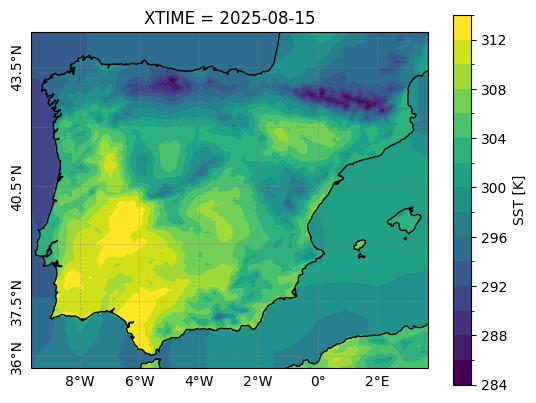

In [13]:
ax = create_plot(prj_mercator)

da = ds['SST'].isel(Time=0)
da.plot.contourf(
    'XLONG','XLAT',
    transform = prj_ec,
    levels=16,
    ax=ax,
)

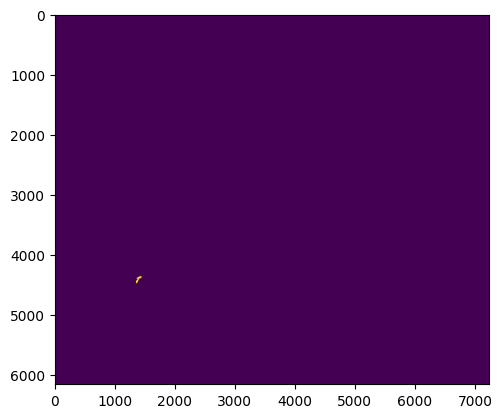

In [26]:
fig, ax = plt.subplots()
da = ds_fire['FIRE_AREA'].isel(Time=0)
ax.imshow(da)

<div class="alert alert-block alert-info">
<b>Requests:</b> 
    
* Could you provide fire variables on a smaller cropped domain?
* We require two independent input files: i. Meteorological file, ii. Fire data file
</div>

## Extracting relevant data

In [20]:
from helper import compute_cell_area

## Compute areas
ds_fire['total_area'] = compute_cell_area(lat = ds_fire.FXLAT, lon = ds_fire.FXLONG)

## Assumed a constant emission
emission_rate = 1E3 # in kg/s/km2
ds_fire['emission'] = emission_rate * ds_fire['total_area'] * ds_fire['FIRE_AREA']

## Assumed emission height
ds_fire['height'] = 10 # in m

## Filtering positive values
flattened = ds_fire.stack(loc=('south_north_subgrid', 'west_east_subgrid'))
ds_flat = flattened.where(flattened['FIRE_AREA']>0, drop=True)

## Create dataframe
df = ds_flat.isel(Time=0).reset_index('loc').to_dataframe()
df

,FIRE_AREA,FGRNHFX,FCANHFX,total_area,emission,height,FXLONG,FXLAT,XTIME,south_north_subgrid,west_east_subgrid
loc,,,,,,,,,,,
0,0.082361,4150.129395,0.0,0.023740,1.955222,10.0,-7.053521,41.985283,2025-08-15,4360,1411
1,0.095792,5547.307617,0.0,0.023740,2.274068,10.0,-7.051656,41.985283,2025-08-15,4360,1412
2,0.047929,1140.193848,0.0,0.023870,1.144055,10.0,-7.057252,41.986664,2025-08-15,4361,1409
3,0.499646,2268.406494,0.0,0.023739,11.861167,10.0,-7.055387,41.986671,2025-08-15,4361,1410
4,0.953624,1360.219849,0.0,0.023805,22.700586,10.0,-7.053521,41.986668,2025-08-15,4361,1411
...,...,...,...,...,...,...,...,...,...,...,...
4508,0.007408,394.788849,0.0,0.023611,0.174899,10.0,-7.141191,42.155605,2025-08-15,4483,1364
4509,0.376068,35965.855469,0.0,0.023610,8.879078,10.0,-7.148653,42.156990,2025-08-15,4484,1360
4510,0.716407,29139.910156,0.0,0.023610,16.914591,10.0,-7.146788,42.156990,2025-08-15,4484,1361


In [21]:
# Save to CSV
fname = "sources.csv"
time1 = 0
time2 = 12*3600
nsrc  = len(df)
nc    = 1
mfr   = df['emission'].sum().item()

# Write to file: first the unstructured data, then the CSV
with open(fname, 'w') as f:
    f.write(f"{time1} {time2}\n")
    f.write(f"{nsrc} {nc}\n")
    f.write(f"{mfr}\n")

df.to_csv(
    fname, 
    mode='a',
    columns = ["FXLONG", "FXLAT", 'height', "emission"],
    sep = " ",
    header = False,
    index = False
)

## FALL3D simulation - Preliminary results

<div class="alert alert-block alert-warning">
<b>Alert:</b> Preliminary results assuming arbitrary emission rates. Still under development
</div>

Text(0.5, 1.0, '16 Aug 2025 00:00')

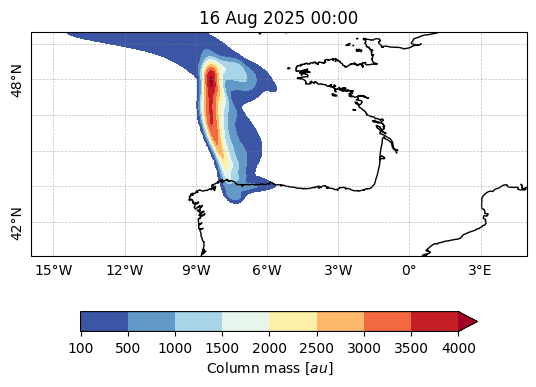

In [13]:
ds = xr.open_dataset('final.res.nc')
it = 24
da = ds['SO2_col_mass'].isel(time=it)
time_fmt = ds.isel(time=it)['time'].dt.strftime("%d %b %Y %H:%M").item()

ax = create_plot(prj_ec)

fc = ax.contourf(
    da.lon,da.lat,da,
    levels    = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
    cmap      = plt.cm.RdYlBu_r,
    extend    = 'max',
    )

cbar=plt.colorbar(
    fc, 
    orientation = 'horizontal',
    label = r'Column mass [$au$]',
    shrink = 0.8,                  
)
ax.set_title(time_fmt)